In [2]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

/var/folders/m8/jg5944xs04x6nwyq75j1wxmw0000gn/T/ipykernel_12412/3234839939.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Exercise 3 [L2]: Interpolation and continuous choice 

Consider the following Python code to create do linear interpolation:

In [3]:
f = lambda x: (x-3)**2 #Define the function to be interpolated

x_interp  = np.linspace(0,6,100) #Define the points at which the function will be interpolated
f_true  = f(x_interp) #Define the true function values at the interpolation points
x_known = np.array([0,1,2,3,4,5,6],dtype=float) #Define points at which the function is known
f_known = f(x_known) #Define the function values at the known points
f_linear_interp = np.interp(x_interp,x_known,f_known) #Linear interpolation between known function values


[9. 4. 1. 0. 1. 4. 9.]


### 1. Plot the true function, the known points and the linearly interpolated function in a single figure.

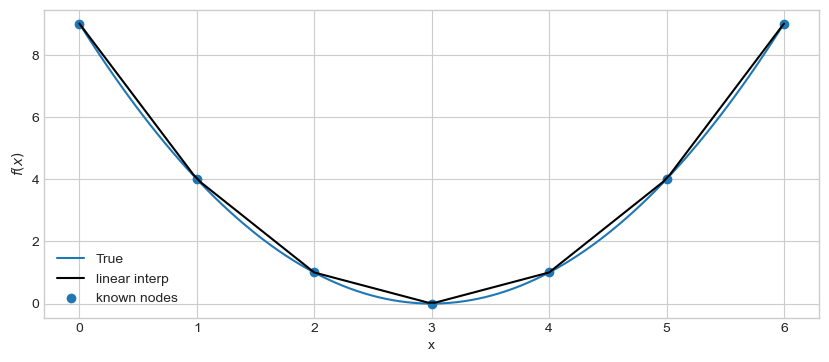

In [3]:
fig = plt.figure(figsize=(10,4)) 

ax = fig.add_subplot(1,1,1)
ax.plot(x_interp,f_true)
ax.plot(x_interp,f_linear_interp,'black')
ax.scatter(x_known,f_known)

ax.set_xlabel("x")
ax.set_ylabel("$f(x)$")
plt.legend(('True','linear interp','known nodes'))

plt.show()

Consider the consumption-saving model with *continous* consumption choice and *infinite time* horizon:
$$\begin{align*}
    V_{t}(W_{t}) & = \max_{c_{t}}\left\{ \sqrt{c_{t}}+\beta V_{t+1}(W_{t+1})\right\} \\
 & \text{s.t.}\\
W_{t+1} & = W_{t}-c_{t} \\
c_{t} & \leq  W_{t} , \,\forall t\\
c_{t} & \in  \mathbb{R}_+, \,\forall t
\end{align*}$$
for $\beta=0.90$ and $W_{1}=10$.

### 2. Solve the model using *value function iteration*, *grid search*, and *linear interpolation*.

Hint: For each possible wealth level (w) we choose consumption as a share of that wealth (). 

In [5]:
# load modules related to this exercise
import Exercise_3 as ex3

# Setup specifications in class. Defining a class is a neat way to access the parameters.
class par: pass
par.beta = 0.90
par.W = 10

# Grid
par.num_W = 200 # number of grid points for W
par.num_C = 50 # number of grid points for the choice space of C
par.grid_W = np.linspace(0.0,par.W,par.num_W) # grid for W
print(par.grid_W)

# Parameters for VFI
par.max_iter = 200   # maximum number of iterations
par.tol = 10e-5 #convergence tol. level

# Solve the model
sol = ex3.solve_consumption_grid_search(par)

[ 0.          0.05025126  0.10050251  0.15075377  0.20100503  0.25125628
  0.30150754  0.35175879  0.40201005  0.45226131  0.50251256  0.55276382
  0.60301508  0.65326633  0.70351759  0.75376884  0.8040201   0.85427136
  0.90452261  0.95477387  1.00502513  1.05527638  1.10552764  1.15577889
  1.20603015  1.25628141  1.30653266  1.35678392  1.40703518  1.45728643
  1.50753769  1.55778894  1.6080402   1.65829146  1.70854271  1.75879397
  1.80904523  1.85929648  1.90954774  1.95979899  2.01005025  2.06030151
  2.11055276  2.16080402  2.21105528  2.26130653  2.31155779  2.36180905
  2.4120603   2.46231156  2.51256281  2.56281407  2.61306533  2.66331658
  2.71356784  2.7638191   2.81407035  2.86432161  2.91457286  2.96482412
  3.01507538  3.06532663  3.11557789  3.16582915  3.2160804   3.26633166
  3.31658291  3.36683417  3.41708543  3.46733668  3.51758794  3.5678392
  3.61809045  3.66834171  3.71859296  3.76884422  3.81909548  3.86934673
  3.91959799  3.96984925  4.0201005   4.07035176  4.

In [6]:
np.linspace(0.0,1.0,par.num_C) 

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

### 3. Plot $V(W)$ (the value function) and $C^{\star}(W)$ (the consumption function). *Ensure that both function are increasing in $W$*. Compare the results to those found in the last exercise. - try changing the number of points in the state grid and consumption guess grid.

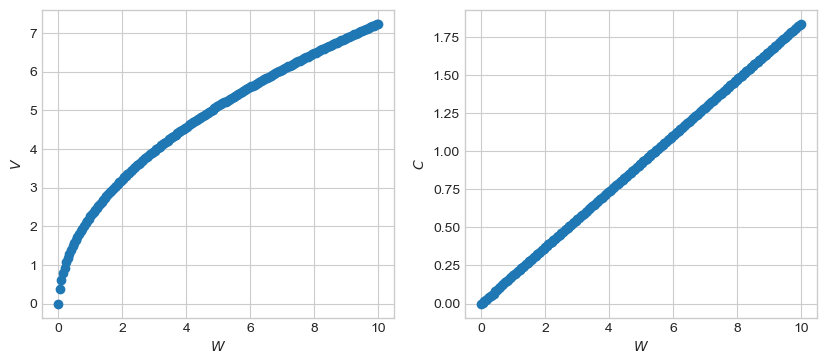

In [7]:
# define figure
def plot_solution(par,sol):
    fig = plt.figure(figsize=(10,4)) # figsize is in inches...
    
    grid_W = par.grid_W

    ax = fig.add_subplot(1,2,1)
    ax.scatter(grid_W,sol.V)
    ax.set_xlabel("$W$")
    ax.set_ylabel("$V$")

    ax_right = fig.add_subplot(1,2,2)
    ax_right.scatter(grid_W,sol.C)
    ax_right.set_xlabel("$W$")
    ax_right.set_ylabel("$C$")
    plt.show()
    
plot_solution(par,sol)

    Compare the results from Exercise 2 and Exercise 3:


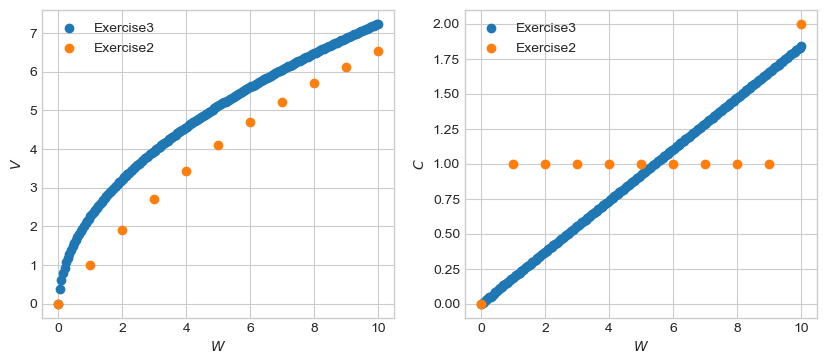

In [8]:
# compare the solution with the last excercise

#re-run ex2:
import Exercise_2 as ex2
class par_ex2: pass
par_ex2.beta = 0.90
par_ex2.W = 10
par_ex2.grid_W = np.arange(par_ex2.W+1)


# Parameters for VFI
par_ex2.max_iter = 200   # maximum number of iterations
par_ex2.tol = 10e-5 #convergence tol. level

sol_ex2 = ex2.solve_VFI(par_ex2)


#Plot the figures
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(1,2,1)
ax.scatter(par.grid_W,sol.V)
ax.scatter(par_ex2.grid_W,sol_ex2.V)
ax.set_xlabel("$W$")
ax.set_ylabel("$V$")
plt.legend(('Exercise3','Exercise2'))


ax_right = fig.add_subplot(1,2,2)
ax_right.scatter(par.grid_W,sol.C)
ax_right.scatter(par_ex2.grid_W,sol_ex2.C)
ax_right.set_xlabel("$W$")
ax_right.set_ylabel("$C$")
plt.legend(('Exercise3','Exercise2'))

print('    Compare the results from Exercise 2 and Exercise 3:')
plt.show()

Number of state grid points: 50
Number of consumption guess grid: 50


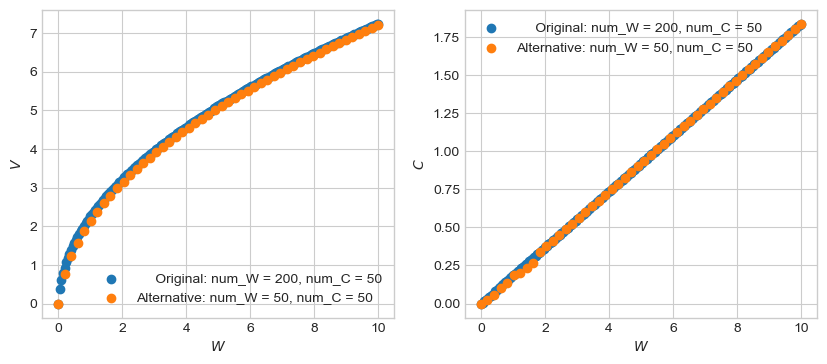

In [18]:
# change the number of points
class par_alt(par): pass # inherit from par
par_alt.num_W = 50 #200
par_alt.num_C = 50 #50
par_alt.grid_W = np.linspace(0.0,par_alt.W,par_alt.num_W)

sol_alt = ex3.solve_consumption_grid_search(par_alt)

print('Number of state grid points:', par_alt.num_W)
print('Number of consumption guess grid:', par_alt.num_C)

#Plot the figures
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(1,2,1)
ax.scatter(par.grid_W,sol.V)
ax.scatter(par_alt.grid_W,sol_alt.V)
ax.set_xlabel("$W$")
ax.set_ylabel("$V$")
plt.legend((f'     Original: num_W = {par.num_W}, num_C = {par.num_C}',f'Alternative: num_W = {par_alt.num_W}, num_C = {par_alt.num_C}'))


ax_right = fig.add_subplot(1,2,2)
ax_right.scatter(par.grid_W,sol.C)
ax_right.scatter(par_alt.grid_W,sol_alt.C)
ax_right.set_xlabel("$W$")
ax_right.set_ylabel("$C$")
plt.legend((f'     Original: num_W = {par.num_W}, num_C = {par.num_C}',f'Alternative: num_W = {par_alt.num_W}, num_C = {par_alt.num_C}'))

plt.show()